In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
import random
import sklearn


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from math import sqrt

from catboost import CatBoostRegressor
from catboost import Pool, cv

%matplotlib inline

In [2]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб_2/Выборка_ектб.xlsx', sheet_name = 0)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,MAE,MAPE,Цена(кв.м)_пр,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,-357428.609409,-0.051061,104657.590461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,0,этажи,16.231424,11200000,11400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,-655071.589883,-0.152342,122650.286878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_этажи,0,этажи,15.555977,5700000,6000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_этажи,0,этажи,14.557448,2100000,2200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13331,8466_авито,1,авито,15.659230,6320000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,переуступка,NaN,ЖК «Ботаника LIFE»,NaN,другое,Сдан 4 кв. 2023,NaN
13332,8467_авито,0,авито,15.147877,3790000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13333,8468_авито,0,авито,15.054464,3452000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13334,8469_авито,0,авито,15.176487,3900000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[df['Мусор'] == 0]
df = df[df['dup_res'] == 0]
df = df[df['Выбросы'] == 0]

#df = df[df['LN(Цена)'] <= 18]
#df = df[df['LN(Цена)'] >= 14.5]

df.reset_index(drop = True, inplace = True)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,MAE,MAPE,Цена(кв.м)_пр,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,-357428.609409,-0.051061,104657.590461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,-655071.589883,-0.152342,122650.286878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6_этажи,0,этажи,15.483217,5300000,0,6.115291e+06,-815290.757644,-0.153828,144160.555343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7_этажи,0,этажи,15.679591,6450000,6490000,6.246966e+06,203034.089025,0.031478,109981.794207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15_этажи,0,этажи,15.823725,7450000,7500000,7.502204e+06,-52203.598111,-0.007007,169733.113079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,8464_авито,0,авито,15.293700,4385000,0,5.291969e+06,-906968.874703,-0.206834,170708.673378,...,NaN,NaN,NaN,NaN,NaN,ЖК «Миллениум»,"Дом 5 (секц. А, Б)",другое,Сдан 2 кв. 2017,NaN
7954,8467_авито,0,авито,15.147877,3790000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7955,8468_авито,0,авито,15.054464,3452000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7956,8469_авито,0,авито,15.176487,3900000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Цена'>

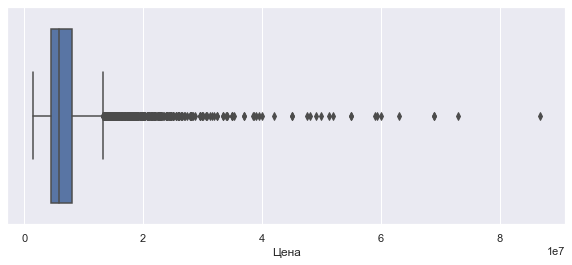

In [4]:
sns.set()
plt.figure(figsize = (10, 4))
sns.boxplot(df['Цена'], orient = 'h')

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='LN(Цена)'>

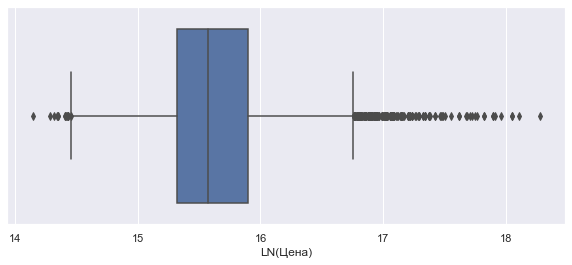

In [5]:
plt.figure(figsize = (10, 4))
sns.boxplot(df['LN(Цена)'], orient = 'h')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0    4500000
Name: Цена, dtype: int64


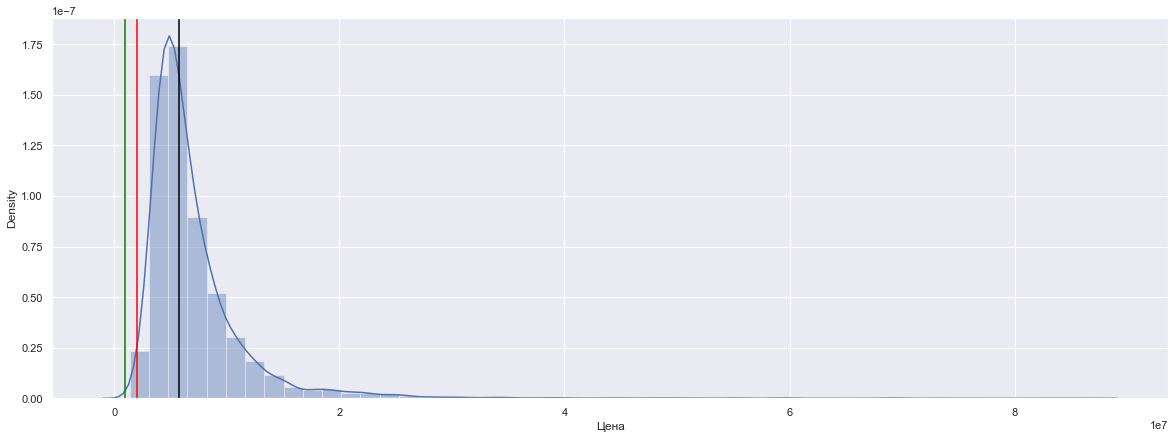

In [6]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['Цена'])

plt.axvline(2000000, color = 'red')
plt.axvline(1000000, color = 'green')

plt.axvline(df['Цена'].median(), color = 'black')

print(df['Цена'].mode())

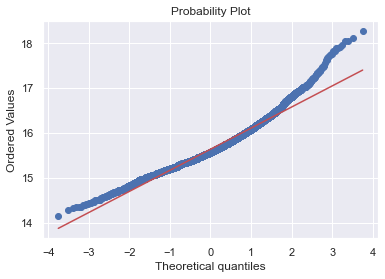

In [7]:
scipy.stats.probplot(df['LN(Цена)'], dist = "norm", plot = pylab)
pylab.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Цена(кв.м)', ylabel='Density'>

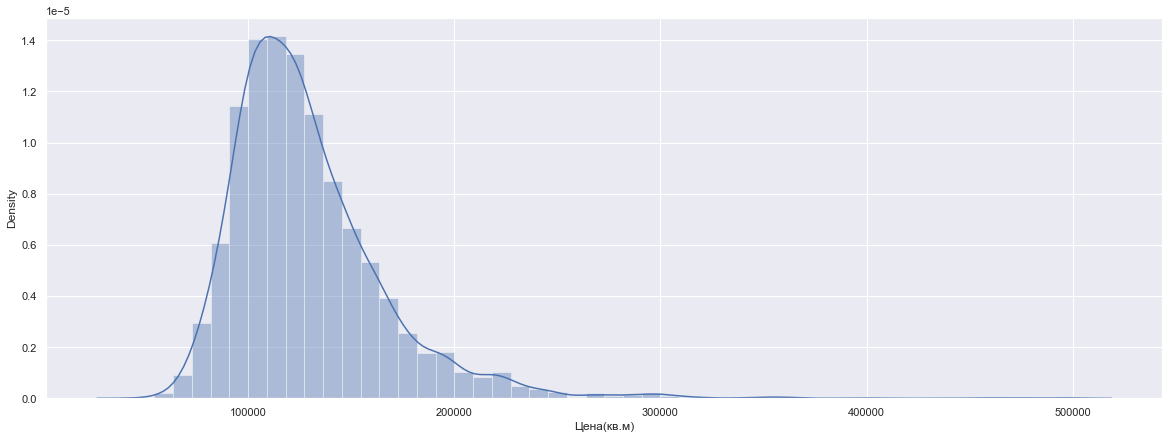

In [8]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['Цена(кв.м)'])

interval columns not set, guessing: ['Цена', 'LN(Цена)', 'ОПлощадь', 'Этаж_1', 'Этажность_1', 'ГП', 'Терраса', 'Многоуровневость', 'Раст_метро_1', 'Раст_центр_1']


<AxesSubplot: >

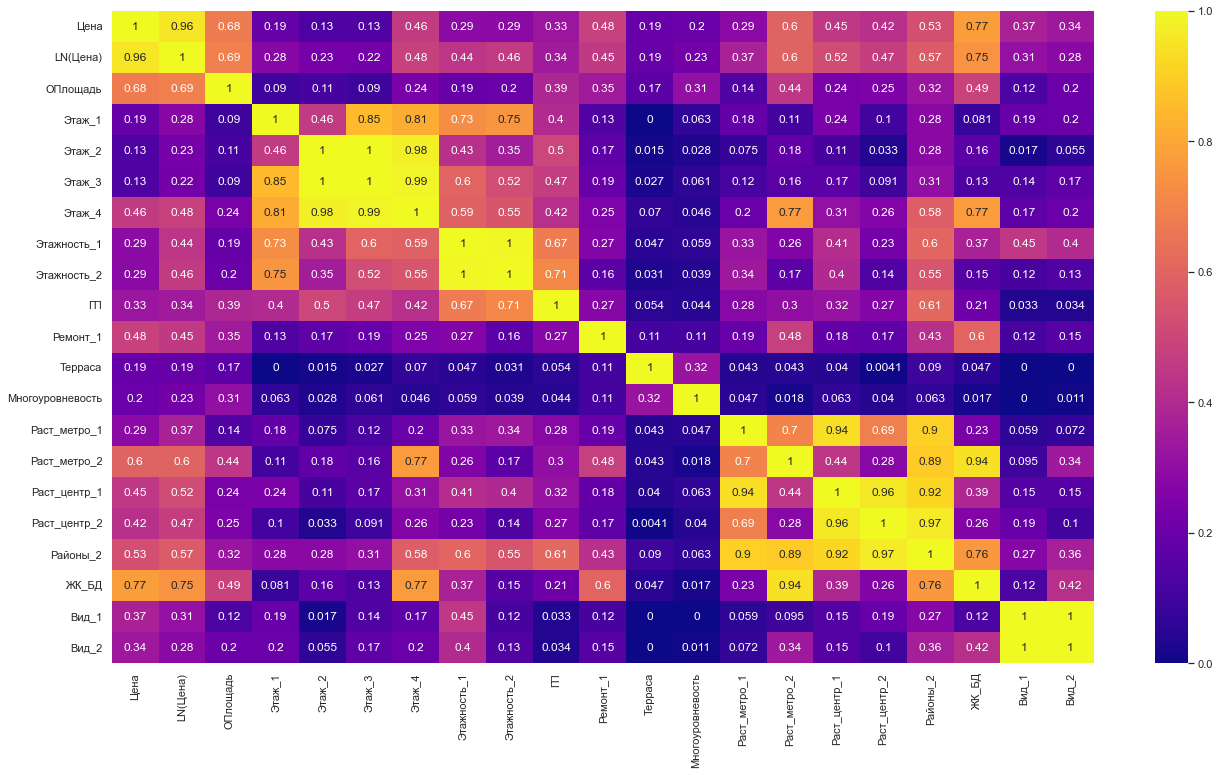

In [31]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

cmap = sns.color_palette("plasma", as_cmap = True)

phik_overview = df[['Цена', 'LN(Цена)', 'ОПлощадь', 'Этаж_1', 'Этаж_2', 'Этаж_3', 'Этаж_4', 'Этажность_1', 'Этажность_2', 
                      'ГП', 'Ремонт_1', 'Терраса', 'Многоуровневость', 'Раст_метро_1', 'Раст_метро_2',
                      'Раст_центр_1', 'Раст_центр_2', 'Районы_2', 'ЖК_БД', 'Вид_1', 'Вид_2']].phik_matrix()

plt.figure(figsize = (22, 12))
sns.heatmap(phik_overview, annot = True, cmap = cmap)

In [9]:
X = df[[
        'ОПлощадь',
        #'Этаж_1',
        #'Этаж_2',
        #'Этаж_3',
        'Этаж_4',
        'Этажность_1',
        #'Этажность_2',
        'ГП',
        'Ремонт_1',
        #'Долгота',
        #'Широта',
        'Раст_центр_1',
        #'Раст_центр_2',
        #'Раст_метро_1',
        'Раст_метро_2',
        'Районы_2',
        'Многоуровневость',
        'Терраса',
        'ЖК_БД',
        'Вид_1',
        #'Вид_2'
      ]]

Y = df['LN(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 6, 7, 10, 11]


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7958 entries, 0 to 7957
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ОПлощадь          7958 non-null   float64
 1   Этаж_4            7958 non-null   object 
 2   Этажность_1       7958 non-null   int64  
 3   ГП                7958 non-null   float64
 4   Ремонт_1          7958 non-null   object 
 5   Раст_центр_1      7958 non-null   float64
 6   Раст_метро_2      7958 non-null   object 
 7   Районы_2          7958 non-null   object 
 8   Многоуровневость  7958 non-null   float64
 9   Терраса           7958 non-null   float64
 10  ЖК_БД             7958 non-null   object 
 11  Вид_1             7958 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 746.2+ KB


In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

#n_folds = 7
#kf = KFold(n_splits = n_folds,  = False, random_state = 0)

catb = CatBoostRegressor(
         iterations = 3500, #максимальное количество построенных деревьев
         random_seed = 6, 
         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
         max_depth = 4, #глубина дерева
         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
         #l2_leaf_reg = 20, #коэффициент при члене регуляризации L2 функции потерь
         #bagging_temperature = 1,
         #random_strength = 1,
         one_hot_max_size = 35, #не используем one hot encoding, а включаем one_hot_max_size
         #loss_function = 'MAE', #по умолчанию
         #eval_metric = 'MAPE', #MAPE
         #od_type = 'Iter', #если модель переобучилась
         #od_wait = 20
        ) #делай остановку через 20 итераций
         #если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
         #если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

shuffle_split = ShuffleSplit(n_splits = 10, test_size = 0.10, random_state = 0)

#массив для сохранения итоговых оценок
all_rmse = [] 
all_mae = []
all_mape = []
all_r2 = []

tr = []
te = []

for n, (tr_index, te_index) in enumerate(shuffle_split.split(X, Y)): #kf.split(X, Y)
    print('Обработка процесса №', n)
    
    tr.append(tr_index)
    te.append(te_index)
    
    # Split data and target
    X_train = X.iloc[tr_index]
    Y_train = Y.iloc[tr_index]
    X_test = X.iloc[te_index]
    Y_test = Y.iloc[te_index]


    catb.fit(X_train, Y_train, 
             cat_features = cat_features, #массив с индексами категориальных фичей
             eval_set = (X_test, Y_test),
             verbose = False, 
             #plot = True
            ) #включение графика
 
    pred_test = np.exp(catb.predict(X_test))
    mse_test = mse(np.exp(Y_test), pred_test)
    
    all_rmse.append(round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
    all_mae.append(round(mae(np.exp(Y_test), pred_test), 4))
    all_mape.append(round(mape(np.exp(Y_test), pred_test), 4))
    all_r2.append(r2_score(np.exp(Y_test), pred_test))

Обработка процесса № 0


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 1


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 2


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 3


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 4


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 5


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 6


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 7


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 8


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 9


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [12]:
# массив оценок по k блокам
print('MAE:', all_mae)
print('RMSE:', all_rmse)
print('MAPE:', all_mape)
print('R2:', all_r2)

MAE: [591293.0299, 573084.9098, 566751.2014, 568786.5754, 583506.4797, 602495.3206, 554116.1424, 585565.3559, 587771.8649, 604837.2931]
RMSE: [1034727.328, 898635.5031, 1312233.757, 873889.7635, 955654.0933, 1049305.5517, 871830.4078, 1182227.4052, 1000127.7189, 1155677.5677]
MAPE: [0.0795, 0.082, 0.0795, 0.081, 0.08, 0.0806, 0.0759, 0.0757, 0.0774, 0.0794]
R2: [0.9514452384645982, 0.9392468611756456, 0.9352179322382349, 0.9597070824402241, 0.9593289346243412, 0.9481002711275843, 0.9635617190081238, 0.9470233237631056, 0.9417738918449071, 0.9453256813637597]


In [13]:
# среднее значение mae
print('MAE_mean:', np.mean(all_mae))
print('RMSE_mean:', np.mean(all_rmse))
print('MAPE_mean:', np.mean(all_mape))
print('R2_mean:', np.mean(all_r2))

MAE_mean: 581820.8173100001
RMSE_mean: 1033430.90962
MAPE_mean: 0.07910000000000002
R2_mean: 0.9490730936050525


In [ ]:
#С Вид_1
MAE_mean: 625012.14026
RMSE_mean: 1158039.9778
MAPE_mean: 0.08321999999999999
R2_mean: 0.928853977828995
    
#С Вид_2
MAE_mean: 625585.5637100001
RMSE_mean: 1172969.0526899998
MAPE_mean: 0.08320000000000001
R2_mean: 0.9271410958720363

#С Вид_1 и Раст_метро_1
MAE_mean: 620646.7421900001
RMSE_mean: 1168296.76746
MAPE_mean: 0.08207
R2_mean: 0.9285947412413957

#После анализа ошибок
MAE_mean: 581820.8173100001
RMSE_mean: 1033430.90962
MAPE_mean: 0.07910000000000002
R2_mean: 0.9490730936050525

In [1131]:
tr[2]

array([ 292, 1933, 2853, ...,  281,  585,  323])

In [1132]:
te[2] #2861

array([ 166, 1136, 2560, 4032, 4216, 4455, 2284, 3466, 3173, 2470, 3813,
       3248, 1227, 1087, 1951, 1091, 3369, 3845, 3318,  881, 3880, 2089,
       3737, 3667,  112, 3239, 2487, 1723, 4040,  553,  318, 2374,  976,
        236, 3098, 2125, 4454, 2531, 2119, 1674,  656, 2965, 4269, 3496,
       1369, 1920, 4442, 2111,  588, 4365, 1817, 2377, 3157, 3206, 4248,
       1554,  875, 3488, 2148, 4474,  457, 3860, 1671, 2152, 3401, 3717,
       2369, 2919, 4327, 3089, 2204,   49, 2245, 1869, 3454,  152, 1077,
       3219, 3019, 3155,  269, 2459, 3384,  619, 1069, 3472, 4015, 3085,
       4394,  743, 4159,  174, 2615, 2005, 3210, 3055, 1756,  854, 3024,
       1251, 1247,  366, 1601, 4081, 3757,  282,  368,  765,  481, 3324,
       1447, 2664, 3243, 1709,  645, 2738, 2276, 3463,  146, 2234, 3946,
       3697, 4110, 2842, 2556, 1547, 3260, 2236, 1229,  925, 3515, 2060,
       1216, 1536, 3951,  250, 2947,   93, 4285,  848,  541,  365,  379,
        667, 1288,  313,  393, 2916, 2805, 1207, 34

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 682767.5533
RMSE на обучении: 988422.0964
MAPE на обучении: 0.0725
R2 на обучении: 0.9737
MAE на тесте: 853755.3064
RMSE на тесте: 1710960.6362
MAPE на тесте: 0.0829
R2 на тесте: 0.9262
MAE: 699896.7129
RMSE: 1082758.344
MAPE: 0.0735
R2: 0.9687


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


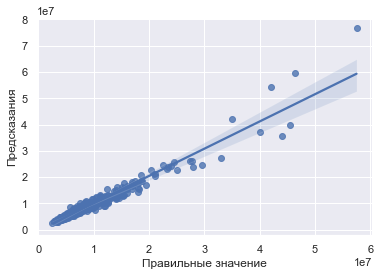

In [1130]:
# Split data and target
X_train = X.iloc[tr[7]]
Y_train = Y.iloc[tr[7]]
X_test = X.iloc[te[7]]
Y_test = Y.iloc[te[7]]

catb = CatBoostRegressor(iterations = 3500, #максимальное количество построенных деревьев
                         random_seed = 6, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 4, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

#pred_val = catb.predict(X_val)
#mse_val = mse(Y_val, pred_val)
#print("MAE на валидации:", round(mae(Y_val, pred_val), 4))
#print("RMSE на валидации:", round(sqrt(mse(Y_val, pred_val)), 4))
#print("MAPE на валидации:", round(mape(Y_val, pred_val), 4))
#print("R2 на валидации:", round(r2_score(Y_val, pred_val), 4))
#print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(np.exp(Y_test), pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 703753.7864
RMSE на обучении: 1034360.2783
MAPE на обучении: 0.0745
R2 на обучении: 0.969
MAE на тесте: 875070.3169
RMSE на тесте: 1690297.9317
MAPE на тесте: 0.0872
R2 на тесте: 0.9382
MAE: 720919.6951
RMSE: 1117577.3523
MAPE: 0.0757
R2: 0.965


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


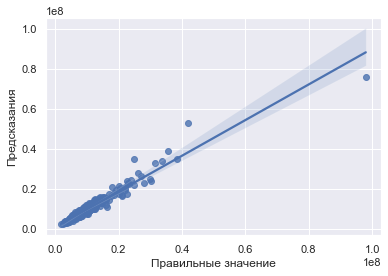

In [1098]:
# Split data and target
X_train = X.iloc[tr[3]]
Y_train = Y.iloc[tr[3]]
X_test = X.iloc[te[3]]
Y_test = Y.iloc[te[3]]

catb = CatBoostRegressor(iterations = 3500, #максимальное количество построенных деревьев
                         random_seed = 6, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 4, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

#pred_val = catb.predict(X_val)
#mse_val = mse(Y_val, pred_val)
#print("MAE на валидации:", round(mae(Y_val, pred_val), 4))
#print("RMSE на валидации:", round(sqrt(mse(Y_val, pred_val)), 4))
#print("MAPE на валидации:", round(mape(Y_val, pred_val), 4))
#print("R2 на валидации:", round(r2_score(Y_val, pred_val), 4))
#print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(np.exp(Y_test), pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [1073]:
df[df['Цена'] == 98000000]

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,Прогноз_3,MAE,...,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
1375,2144_циан,0,циан,18.400478,98000000,NaN,9.767610e+07,9.962360e+07,9.620402e+07,1.795984e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Свободная продажа, Возможна ипотека"
2861,1894_фарпост,0,фарпост,18.400478,98000000,NaN,8.515501e+07,9.028892e+07,8.524929e+07,1.275071e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1077]:
df.drop(labels = [2861], axis = 0, inplace = True)

In [1078]:
df[df['Цена'] == 98000000]

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,Прогноз_3,MAE,...,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
1375,2144_циан,0,циан,18.400478,98000000,NaN,9.767610e+07,9.962360e+07,9.620402e+07,1.795984e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Свободная продажа, Возможна ипотека"


# Модель

In [14]:
X = df[[
        'ОПлощадь',
        #'Этаж_1',
        #'Этаж_2',
        #'Этаж_3',
        'Этаж_4',
        'Этажность_1',
        #'Этажность_2',
        'ГП',
        'Ремонт_1',
        #'Долгота',
        #'Широта',
        'Раст_центр_1',
        #'Раст_центр_2',
        #'Раст_метро_1',
        'Раст_метро_2',
        'Районы_2',
        'Многоуровневость',
        'Терраса',
        'ЖК_БД',
        'Вид_1',
        #'Вид_2'
      ]]

Y = df['LN(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[1, 4, 6, 7, 10, 11]


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.12, random_state = 42)
#X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.67, random_state = 42)
#test_size = 0.10 согласно learning_curve

In [18]:
print(len(X_train))
print(len(X_test))
#print(len(X_val))

7003
955


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 533653.3112
RMSE на обучении: 847451.3043
MAPE на обучении: 0.0739
R2 на обучении: 0.969
MAE на тесте: 581613.5893
RMSE на тесте: 928158.1112
MAPE на тесте: 0.0789
R2 на тесте: 0.9572
MAE: 539408.7857
RMSE: 857537.6875
MAPE: 0.0745
R2: 0.9678


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


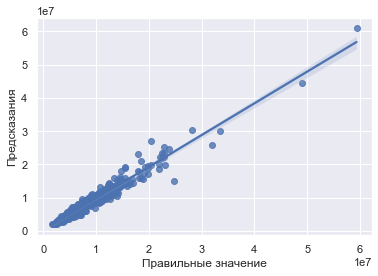

In [19]:
catb = CatBoostRegressor(iterations = 5500, #максимальное количество построенных деревьев
                         random_seed = 6, 
                         learning_rate = 0.01, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 5, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 35, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(np.exp(Y_test), pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [20]:
f = catb.get_feature_importance(prettified = True)
f = pd.DataFrame(f)
f

,Feature Id,Importances
0,ОПлощадь,52.019325
1,Раст_центр_1,17.292461
2,ГП,15.577572
3,Этажность_1,3.341570
4,Районы_2,3.178073
5,Раст_метро_2,2.470342
6,Ремонт_1,2.325048
7,ЖК_БД,1.945594
8,Этаж_4,1.818155
9,Многоуровневость,0.017504


Text(0.5, 0, 'CatBoost Feature Importance')

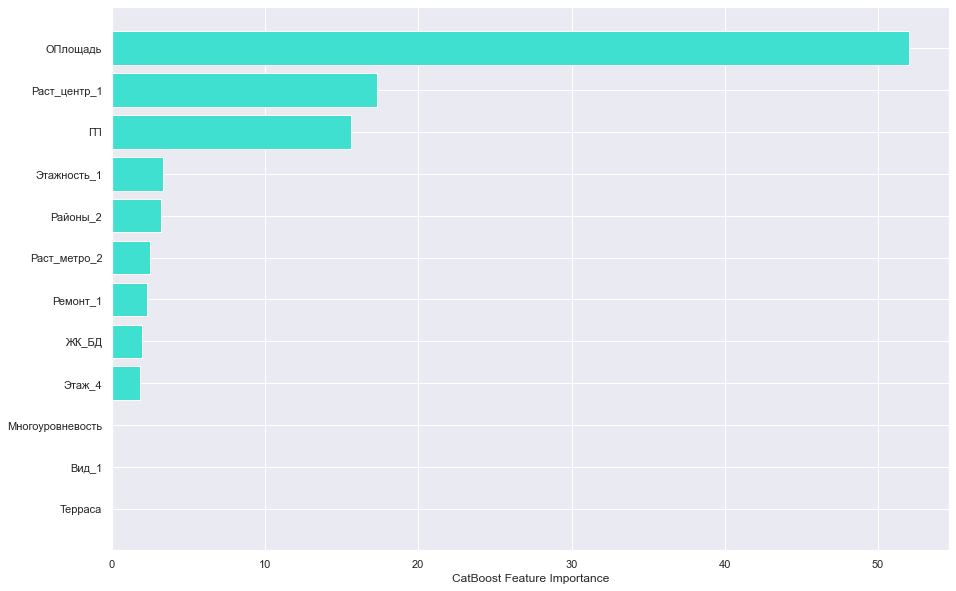

In [21]:
from sklearn.inspection import permutation_importance

feature_names = [
                    'ОПлощадь',
                    #'Этаж_1',
                    #'Этаж_2',
                    #'Этаж_3',
                    'Этаж_4',
                    'Этажность_1',
                    #'Этажность_2',
                    'ГП',
                    'Ремонт_1',
                    'Раст_центр_1',
                    'Раст_метро_2',
                    'Районы_2',
                    'Многоуровневость',
                    'Терраса',
                    'ЖК_БД',
                    'Вид_1',
                    #'Вид_2'
                ]
features = np.array(feature_names)

sorted_feature_importance = catb.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catb.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

In [22]:
pred_test

array([10872787.75841698,  3206779.50116801,  8646004.33849244,
        5657007.19776726,  3841776.17622678,  2975332.72745361,
       10309236.92642948, 12869620.89462508,  7721134.93321683,
        5193218.19834644, 11895629.89386649, 30183680.15431786,
        5416951.2588608 ,  4186138.37443251,  8231832.94209267,
        4564168.45567693,  8718730.68249856,  6926515.67312161,
        3882477.91219324,  6010561.94732634,  4000338.81700574,
       10451233.14861194,  3495755.46084862,  6029323.70558979,
        4479246.22649419,  6688510.55269858,  5166203.70280617,
        8405953.03844091,  3768469.41594473,  4490367.54325017,
        6063797.58832374,  5147954.38945767,  6519505.64547833,
        3330841.87823864,  3046992.16636521,  4925355.28096482,
        9923359.82849389,  8753648.36063216,  4271707.41978581,
        5614581.76018578,  7457751.02099251,  3548491.39244787,
        9118036.91051793, 11359505.42809956,  4622095.40223124,
       12186323.27912961,  9447302.83617

In [23]:
pred = pd.DataFrame(pred_1, columns = ['Прогноз'])
pred['ID'] = df['ID']
pred

,Прогноз,ID
0,7.315261e+06,1_этажи
1,4.923574e+06,3_этажи
2,6.056768e+06,6_этажи
3,6.173033e+06,7_этажи
4,7.472315e+06,15_этажи
...,...,...
7953,5.297718e+06,8464_авито
7954,4.253817e+06,8467_авито
7955,3.777030e+06,8468_авито
7956,3.866094e+06,8469_авито


In [24]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Ектб_2_прогноз_ln.xlsx')
pred.to_excel(writer, 'прогноз')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_20000\4284625430.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# Анализ ошибок

In [25]:
pred['Истина'] = df['Цена']
pred['MAE'] = pred['Истина'] - pred['Прогноз']
pred

,Прогноз,ID,Истина,MAE
0,7.315261e+06,1_этажи,7000000,-315260.780670
1,4.923574e+06,3_этажи,4300000,-623574.436842
2,6.056768e+06,6_этажи,5300000,-756768.110306
3,6.173033e+06,7_этажи,6450000,276967.222331
4,7.472315e+06,15_этажи,7450000,-22315.213466
...,...,...,...,...
7953,5.297718e+06,8464_авито,4385000,-912718.329665
7954,4.253817e+06,8467_авито,3790000,-463816.720736
7955,3.777030e+06,8468_авито,3452000,-325030.387942
7956,3.866094e+06,8469_авито,3900000,33905.795052


In [26]:
pred['MAPE'] = pred['MAE'] / pred['Истина']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


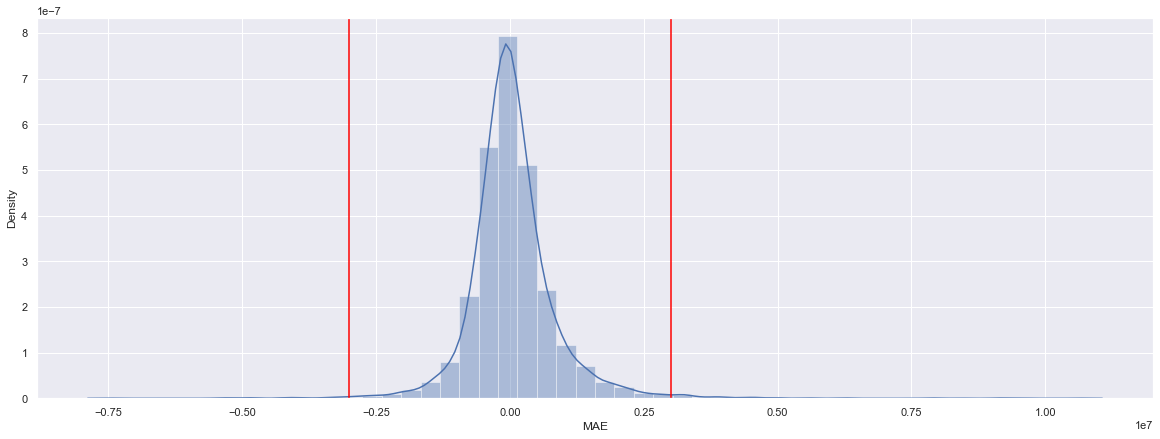

In [27]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(pred['MAE'])

plt.axvline(-3000000, color = 'red')
plt.axvline(3000000, color = 'red')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


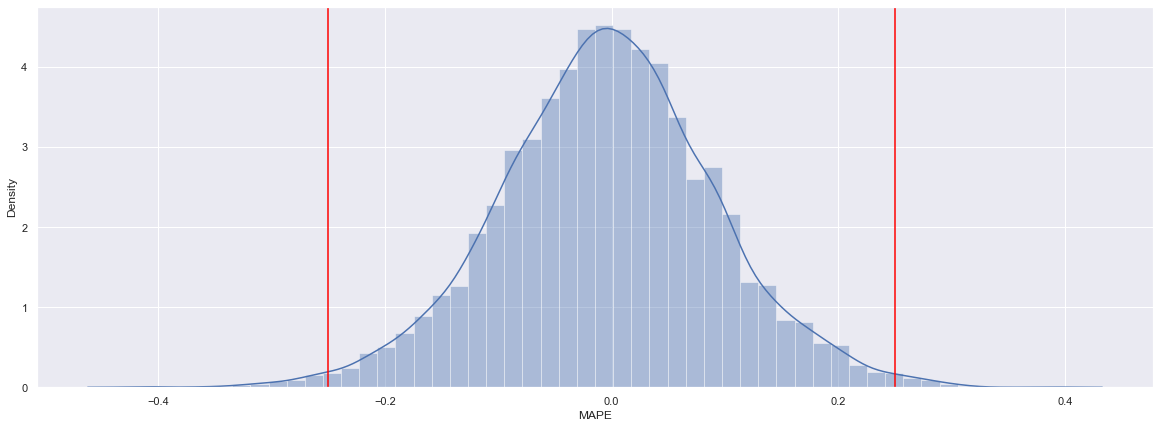

In [28]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(pred['MAPE'])

plt.axvline(-0.25, color = 'red')
plt.axvline(0.25, color = 'red')

25


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


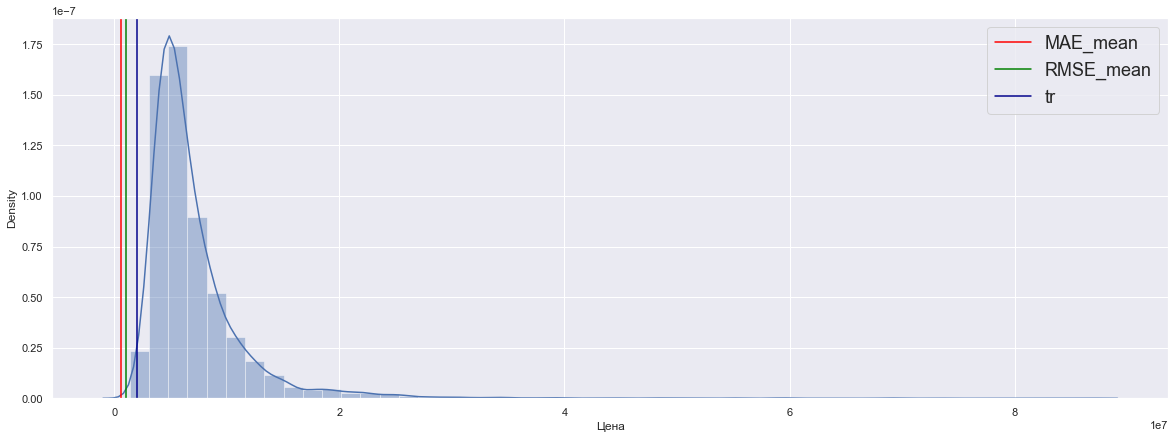

In [30]:
#График строится для понимания: mae и rmse - это много относительно цен квартир или нет?
#MAE_mean: 776758.67782
#RMSE_mean: 1215716.1590000002

tr = 2000000
print(len(df[df['Цена'] <= tr]))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['Цена'])

plt.axvline(581820.8173100001, color = 'red', label = 'MAE_mean')
plt.axvline(1033430.90962, color = 'green', label = 'RMSE_mean')
plt.axvline(tr, color = 'darkblue', label = 'tr')
#plt.axvline(0.08, color = 'green', label = 'медиана')
plt.legend(prop = {'size': 18})

In [32]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб_2/Выборка_ектб.xlsx', sheet_name = 0)
df = df[df['Мусор'] == 0]
df = df[df['dup_res'] == 0]
df = df[df['Выбросы'] == 0]
#df = df[df['LN(Цена)'] <= 17.5]
df.reset_index(drop = True, inplace = True)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,7.315261e+06,-315260.780670,-0.045037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,4.923574e+06,-623574.436842,-0.145017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6_этажи,0,этажи,15.483217,5300000,0,6.115291e+06,6.056768e+06,-756768.110306,-0.142786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7_этажи,0,этажи,15.679591,6450000,6490000,6.246966e+06,6.173033e+06,276967.222331,0.042941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15_этажи,0,этажи,15.823725,7450000,7500000,7.502204e+06,7.472315e+06,-22315.213466,-0.002995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,8464_авито,0,авито,15.293700,4385000,0,5.291969e+06,5.297718e+06,-912718.329665,-0.208146,...,NaN,NaN,NaN,NaN,NaN,ЖК «Миллениум»,"Дом 5 (секц. А, Б)",другое,Сдан 2 кв. 2017,NaN
7954,8467_авито,0,авито,15.147877,3790000,0,NaN,4.253817e+06,-463816.720736,-0.122379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7955,8468_авито,0,авито,15.054464,3452000,0,NaN,3.777030e+06,-325030.387942,-0.094157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7956,8469_авито,0,авито,15.176487,3900000,0,NaN,3.866094e+06,33905.795052,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Анализ ошибок (престижные+)

In [33]:
df_pres_plus = df[df['ЖК_БД'] == 'престижный+']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

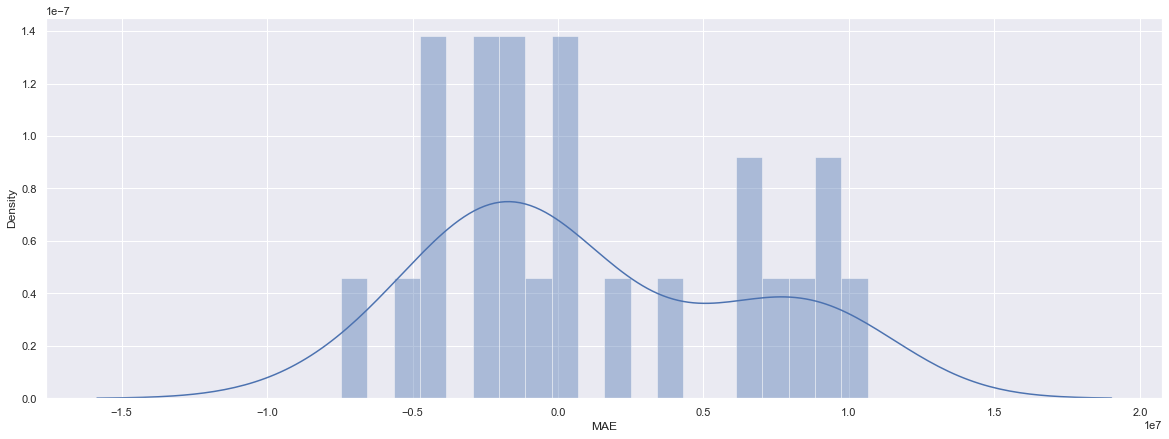

In [34]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres_plus['MAE'], bins = 20)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

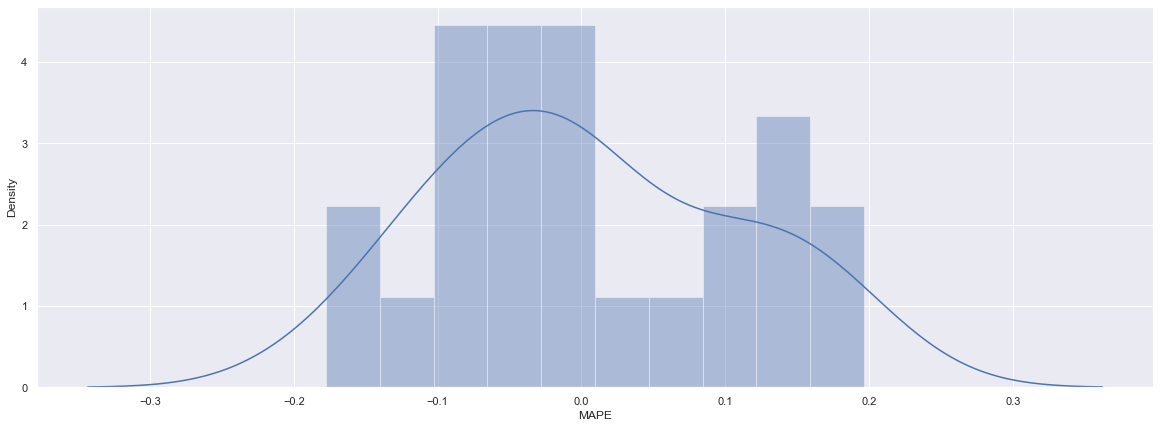

In [35]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres_plus['MAPE'], bins = 10)

# Анализ ошибок (престижные)

In [36]:
df_pres = df[df['ЖК_БД'] == 'престижный']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

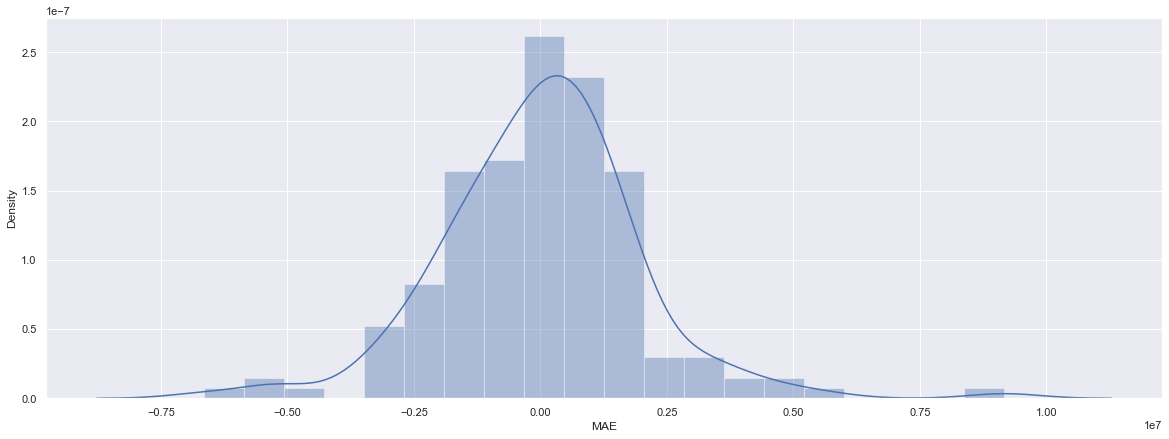

In [37]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres['MAE'], bins = 20)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

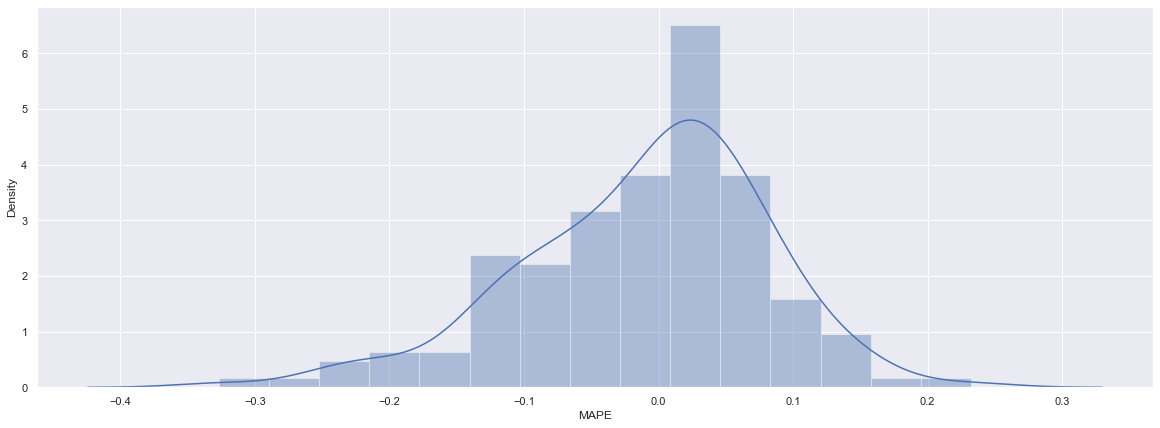

In [38]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres['MAPE'])

# Анализ ошибок (премиальный+)

In [43]:
df_prem = df[df['Ремонт_1'] == 'премиальный+']

In [44]:
annot = df_prem['MAPE']*100
annot = list(annot.round(2))
annot

[12.95, 5.02, -5.49, -5.88, 3.6, 0.07, 8.22, 13.86, -8.2, 5.49, -1.43, 3.81]

In [45]:
annot = list(df_prem['MAPE'].transform(lambda x: '{:,.2%}'.format(x)))
annot

['12.95%',
 '5.02%',
 '-5.49%',
 '-5.88%',
 '3.60%',
 '0.07%',
 '8.22%',
 '13.86%',
 '-8.20%',
 '5.49%',
 '-1.43%',
 '3.81%']

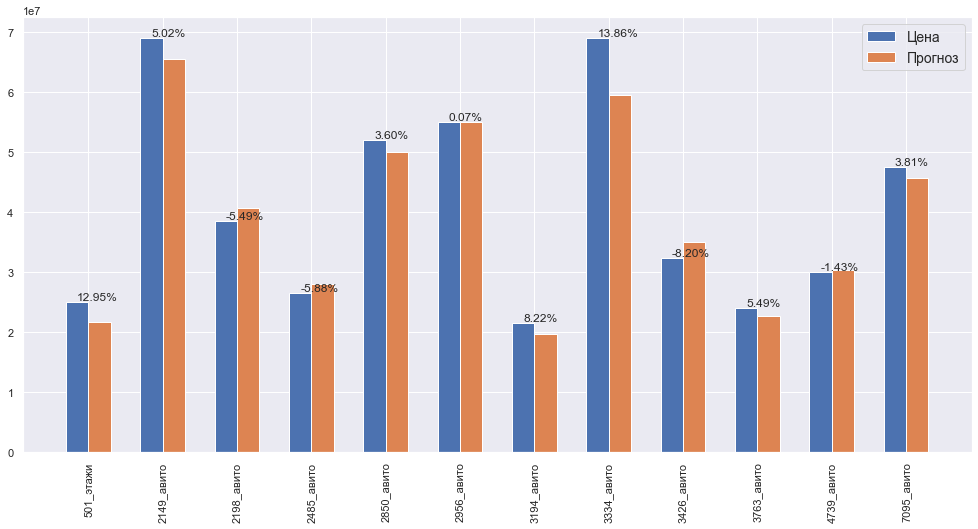

In [48]:
fig = plt.figure(figsize = (17, 8))
ax = fig.add_subplot()

x_labels = list(df_prem['ID'])

x = np.arange(1, 13, 1)
w = 0.3
ax.bar(x - w/2, df_prem['Цена'], width = w, label = 'Цена')
ax.bar(x + w/2, df_prem['Прогноз_2'], width = w, label = 'Прогноз')
ax.set_xticks(x, labels = x_labels, rotation = 90)
ax.legend(prop = {'size': 14})

annot = list(df_prem['MAPE'].transform(lambda x: '{:,.2%}'.format(x)))
rects = ax.patches

for rect, an in zip(rects, annot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, an, ha = "left", va = "bottom")

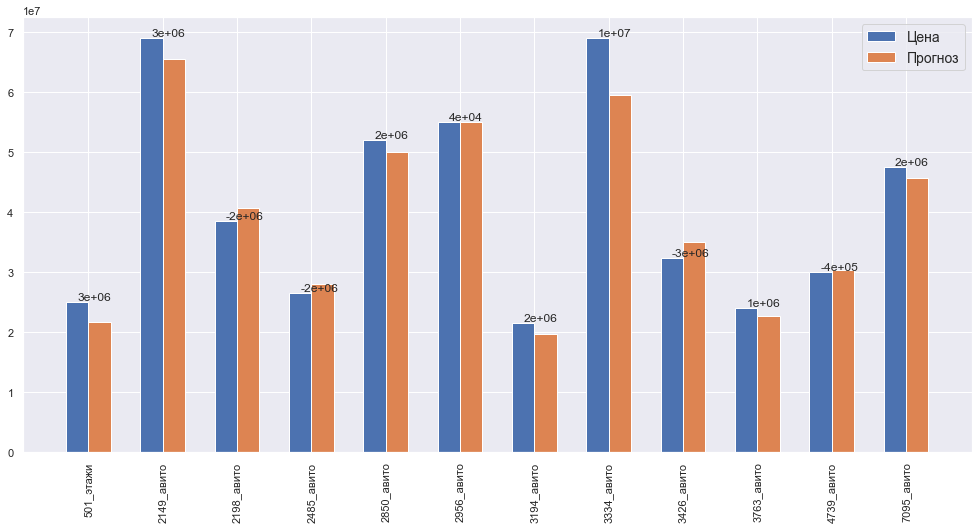

In [49]:
fig = plt.figure(figsize = (17, 8))
ax = fig.add_subplot()

x_labels = list(df_prem['ID'])

x = np.arange(1, 13, 1)
w = 0.3
ax.bar(x - w/2, df_prem['Цена'], width = w, label = 'Цена')
ax.bar(x + w/2, df_prem['Прогноз_2'], width = w, label = 'Прогноз')
ax.set_xticks(x, labels = x_labels, rotation = 90)
ax.legend(prop = {'size': 14})

annot = list(df_prem['MAE'].transform(lambda x: '{:,.0}'.format(x)))
rects = ax.patches

for rect, an in zip(rects, annot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, an, ha = "left", va = "bottom")

# Анализ ошибок (без отделки)

In [50]:
df_noot = df[df['Ремонт_1'] == 'без_отделки']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

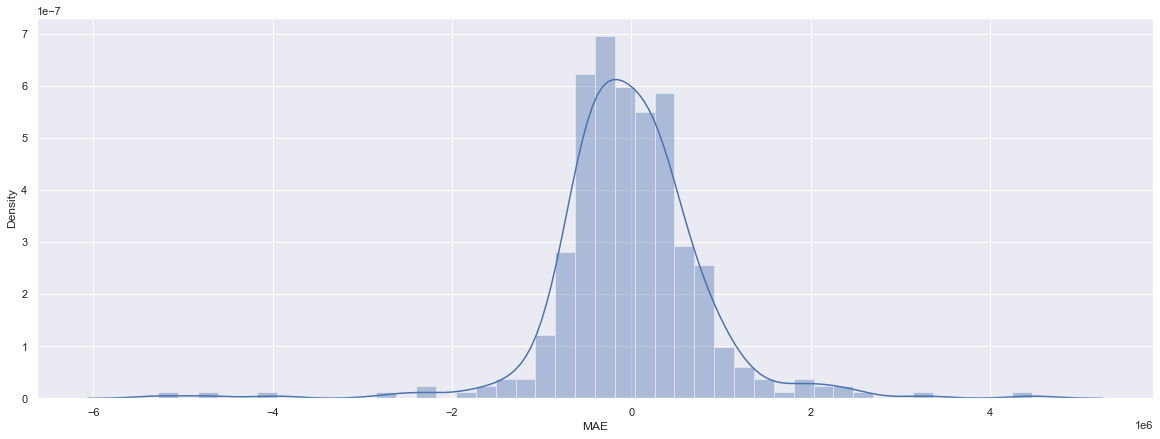

In [51]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_noot['MAE'])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

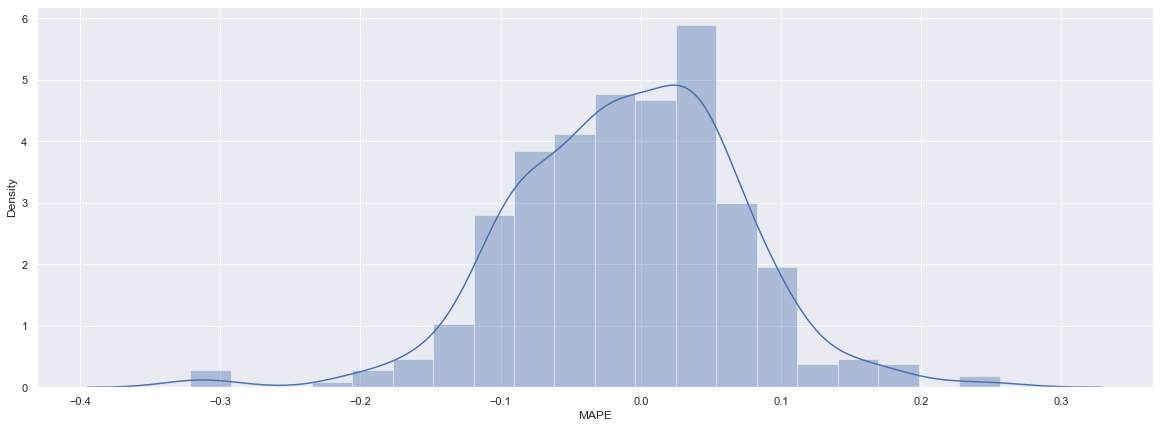

In [52]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_noot['MAPE'])

# Последний этаж

In [53]:
df_fl = df[df['Этаж_4'] == 'последний']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

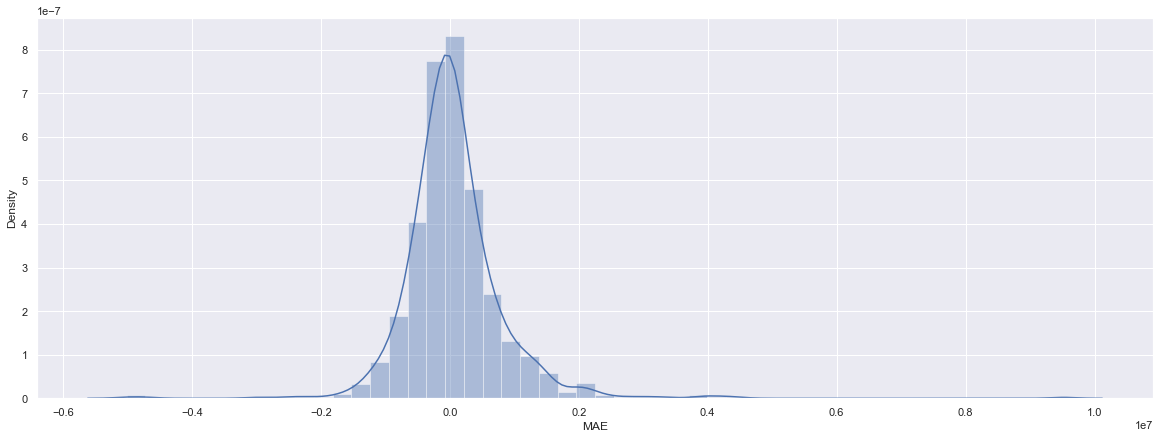

In [54]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_fl['MAE'])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

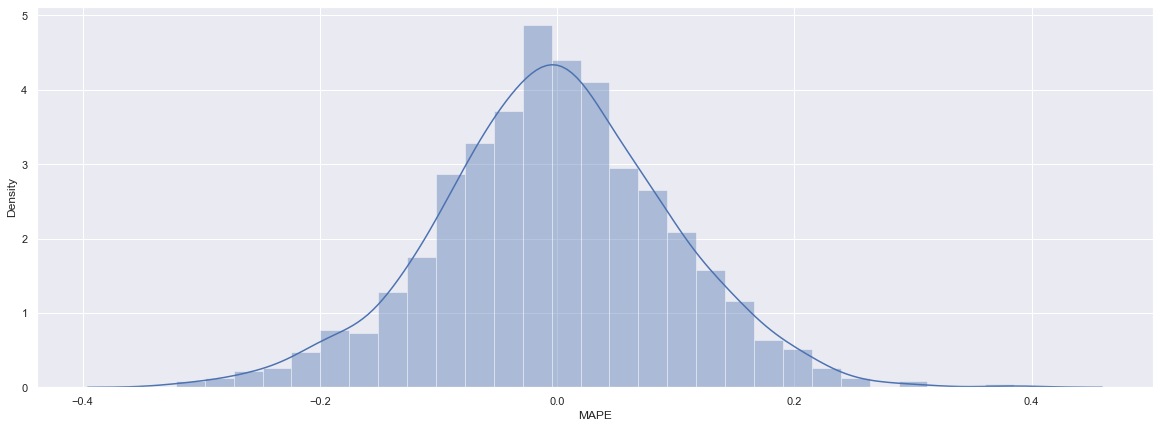

In [55]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_fl['MAPE'])

# Прочее

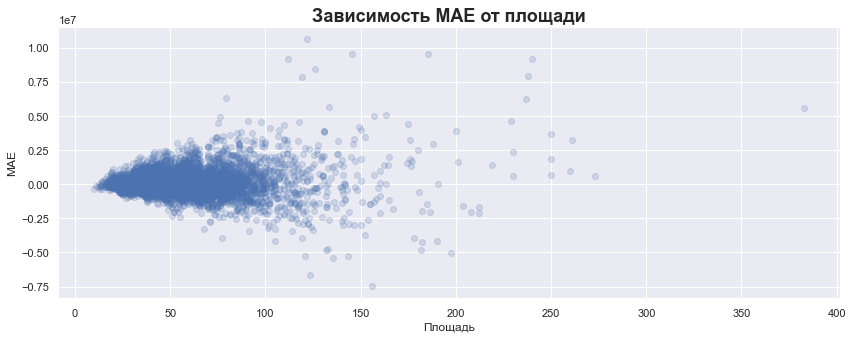

In [56]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['ОПлощадь'], y = df['MAE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Площадь')
plt.ylabel('MAE')
plt.title('Зависимость MAE от площади', fontweight = 'bold', fontsize = 18)
plt.show()

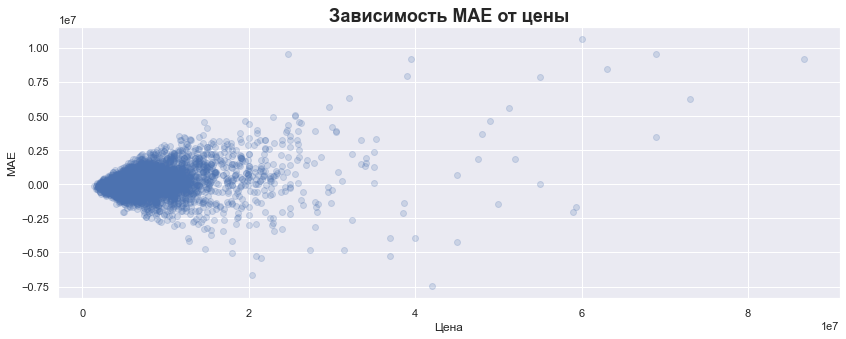

In [57]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['Цена'], y = df['MAE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Цена')
plt.ylabel('MAE')
plt.title('Зависимость MAE от цены', fontweight = 'bold', fontsize = 18)
plt.show()

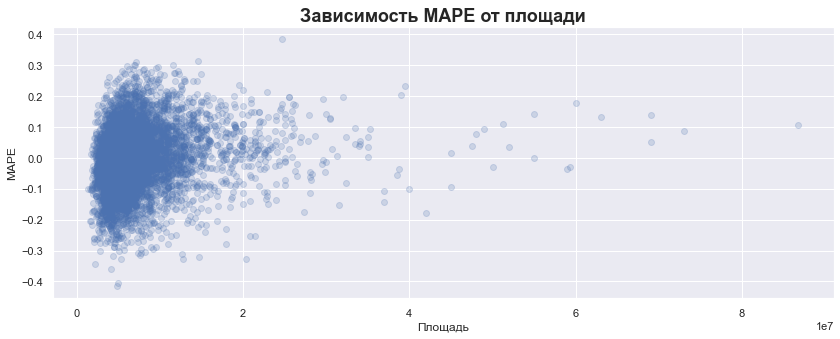

In [58]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['Цена'], y = df['MAPE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Площадь')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от площади', fontweight = 'bold', fontsize = 18)
plt.show()

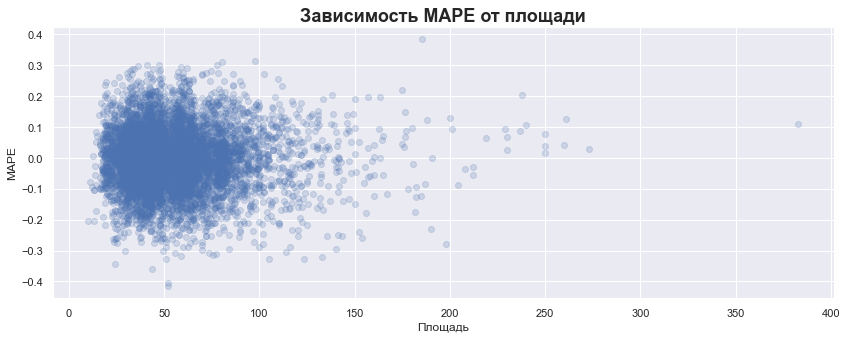

In [59]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['ОПлощадь'], y = df['MAPE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Площадь')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от площади', fontweight = 'bold', fontsize = 18)
plt.show()

# Сохранение модели

In [60]:
import pickle

pickle.dump(catb, open('catbmodel_ektb_best(ln).pkl', 'wb'))

# 310_прогноз

In [128]:
model_1 = pickle.load(open('catbmodel_vladik_best(ln).pkl', 'rb'))

In [129]:
df_310 = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Владивосток/310_от Ильгара_Владивосток.xlsx', sheet_name = 0)
df_310

,report_date,Адрес,Код банка,obj_cd,realty_tp_cd,Адрес_yandex,Долгота,Широта,Сцепка_к,Кадастровый №,...,Прогноз_model,за 1 кв.м.1,Прогноз_model_торг,за 1 кв.м.2,%,абс.,Прогноз_анал*1.1,Accept_модель,%.1,абс..1
0,2023-10-01,"690002, Приморский край, г Владивосток, ул Ком...",843,99373293172,3,"Россия, Приморский край, Владивосток, Комсомол...",131.897630,43.130368,131.89763 43.130368,25:28:000000:12172,...,5.925248e+06,211615.987639,5.603803e+06,200135.820309,0.078276,4.068030e+05,6.164183e+06,accept,0.186104,9.671833e+05
1,2023-10-01,"690091, Приморский край, г Владивосток, пер Не...",843,35895600759,3,"Россия, Приморский край, Владивосток, Некрасов...",131.896372,43.118339,131.896372 43.118339,25:28:000000:37102,...,2.554872e+07,271794.865347,2.416270e+07,257049.993902,0.035470,8.276994e+05,2.657897e+07,accept,0.139017,3.243969e+06
2,2023-10-01,690068 Россия край Приморский г Владивосток ул...,1000,131235683856519264748837164633616456873,3,"Россия, Приморский край, Владивосток, улица Ки...",131.907502,43.175538,131.907502 43.175538,25:28:000000:37173,...,1.339656e+07,157606.612150,1.266980e+07,149056.453441,-0.149578,-2.228443e+06,1.393678e+07,unaccept,-0.064535,-9.614636e+05
3,2023-10-01,"690080, Приморский край, г Владивосток, ул Бас...",843,2467315452,3,"Россия, Приморский край, Владивосток, улица Ба...",131.957727,43.075694,131.957727 43.075694,25:28:000000:67726,...,1.606061e+07,203298.919653,1.518933e+07,192269.953262,0.077257,1.089326e+06,1.670826e+07,accept,0.184983,2.608259e+06
4,2023-10-01,"690080, Приморский край, г Владивосток, ул Бас...",843,58530540092,3,"Россия, Приморский край, Владивосток, улица Ба...",131.956362,43.075589,131.956362 43.075589,25:28:000000:9018,...,1.462863e+07,189982.179066,1.383502e+07,179675.645852,0.024817,3.350247e+05,1.521853e+07,accept,0.127298,1.718527e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2023-10-01,"690041, Приморский край, г Владивосток, ул Гаг...",1481,НККЖ0000000000052384282,3,"Россия, Приморский край, Владивосток, улица Га...",131.940273,43.203244,131.940273 43.203244,25:28:050035:2712,...,1.512321e+07,145415.445383,1.430277e+07,137526.657471,-0.386908,-9.026126e+06,1.573305e+07,unaccept,-0.325598,-7.595848e+06
264,2023-10-01,"690068, Приморский край, г Владивосток, ул Кир...",843,20539727990,3,"Россия, Приморский край, Владивосток, улица Ки...",131.910539,43.181041,131.910539 43.181041,25:28:050038:137,...,6.802833e+06,161972.203745,6.433779e+06,153185.211692,0.025794,1.617789e+05,7.077157e+06,accept,0.128373,8.051568e+05
265,2023-10-01,"690068, Приморский край, г Владивосток, ул Чка...",843,2467333074,3,"Россия, Приморский край, Владивосток, улица Чк...",131.914249,43.179634,131.914249 43.179634,25:28:050039:2078,...,6.712539e+06,152557.712591,6.348384e+06,144281.456683,-0.008065,-5.161591e+04,6.983223e+06,accept,0.091129,5.832225e+05
266,2023-10-01,"Приморский край, г. Владивосток, проспект 100-...",85,103644-1602,3,"Россия, Приморский край, Владивосток, проспект...",131.916701,43.165972,131.916701 43.165972,25:28:050046:2485,...,8.706082e+06,207287.669188,8.233777e+06,196042.313135,0.941929,3.993777e+06,9.057155e+06,accept,1.136121,4.817155e+06


In [130]:
X_310 = df_310[[
                'ОПлощадь',
                #'Этаж_1',
                #'Этаж_2',
                #'Этаж_3',
                'Этаж_4',
                'Этажность_1',
                #'Этажность_2',
                'ГП_2',
                #'Ремонт_2',
                'Ремонт_3',
                #'Долгота',
                #'Широта',
                #'Просмотры_1',
                #'Раст_центр_1',
                #'Раст_центр_2',
                'Раст_центр_3',
                #'Cluster_2',
                'Район_2',
                'Многоуровневая',
                'Терраса',
                #'Витрины',
                'ЖК',
                #'Статус',
                'Вид_мбзп',
                #'Вид_зр'
      ]]

X_310

,ОПлощадь,Этаж_1,Этажность_1,ГП_2,Ремонт_3,Раст_центр_3,Район_2,Многоуровневая,Терраса,ЖК,Вид_мбзп
0,28,4,5,1970,Стандартный,от 1500 до 3000,Первая речка,нет,нет,нет,нет
1,94,9,17,2011,Стандартный,до 1000,Центр,нет,нет,престижный,нет
2,85,2,16,2006,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет
3,79,5,5,2012,Стандартный,от 5000 до 10000,Патрокл,нет,нет,нет,есть
4,77,1,5,2012,Стандартный,от 5000 до 10000,Патрокл,нет,нет,нет,есть
...,...,...,...,...,...,...,...,...,...,...,...
263,104,3,3,2018,Стандартный,более 10000,Седанка_Чайка,нет,нет,нет,нет
264,42,8,9,1988,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет
265,44,1,10,1977,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет
266,42,12,15,2014,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет


In [131]:
pred_t = np.exp(model_1.predict(X_310))

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [132]:
X_310['Прогноз'] = pred_t
X_310

C:\Users\skapr\AppData\Local\Temp\ipykernel_14956\1765764937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_310['Прогноз'] = pred_t


,ОПлощадь,Этаж_1,Этажность_1,ГП_2,Ремонт_3,Раст_центр_3,Район_2,Многоуровневая,Терраса,ЖК,Вид_мбзп,Прогноз
0,28,4,5,1970,Стандартный,от 1500 до 3000,Первая речка,нет,нет,нет,нет,5.761644e+06
1,94,9,17,2011,Стандартный,до 1000,Центр,нет,нет,престижный,нет,2.668628e+07
2,85,2,16,2006,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет,1.366045e+07
3,79,5,5,2012,Стандартный,от 5000 до 10000,Патрокл,нет,нет,нет,есть,1.569080e+07
4,77,1,5,2012,Стандартный,от 5000 до 10000,Патрокл,нет,нет,нет,есть,1.439987e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
263,104,3,3,2018,Стандартный,более 10000,Седанка_Чайка,нет,нет,нет,нет,1.525945e+07
264,42,8,9,1988,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет,6.896312e+06
265,44,1,10,1977,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет,6.676039e+06
266,42,12,15,2014,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет,8.824926e+06


In [133]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Владивосток_прогноз_310.xlsx')
X_310.to_excel(writer, 'прогноз')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_14956\1674591594.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
